Where is the best place to open a restaurant in Lisbon (with Foursquare API)
======

![alt text](https://corinthiahotelswebblob.blob.core.windows.net/production-media-cache/8/8/f/0/9/2/88f092d2376118d7ea5aab3ec91eac61a28aca22.jpg)

### Introduction

***

The aim of this project is to advise someone that would open a restaurant in Lisbon by using Foursquare API and data analysis. Lisbon is a city with many tourists every year so already taken by food businesses. Depending on your budget, you would be able to open everywhere but the issue would be to egt people to your restaurant so competition with others has to be taken. To be able to understand that, targeting the best place in the city is a most. Therefore, we will look at the density of the different places of the city, from hotel to restaurant, passing by bar/café and others.

### Data section

For this Capstone Project, I will mainly use data from the Foursquare API, doing request and scrapping, cleaning what I get. I will use also data from the [wikipedia page of Lisbon ](https://en.wikipedia.org/wiki/Lisbon#Neighborhoods) .
The issue is to determine where to open a restaurant, then I will use the location, latitude, longitude, type of venue of the different neighborhood of Lisbon to understand if the place is prompt to that.

In [2]:
pip  install geopy

     |████████████████████████████████| 122kB 6.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [110]:
import requests 
import pandas as pd 
import numpy as np

from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

import folium

from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


## 1- Creating from nothing every main neighborhood of Lisbon

In [4]:
Lisbon_neigh = ["Alcântara", "Alfama", "Mouraria", "Principe Real", "Ajuda", "Beato", "Belém", "Santos-o-Velho", "Chiado", "Sao Bento", "Santo Condestavel", "Sao Sebastiao da Pedreira", "Sao Francisco Xavier", "Arroios", "Penha de Franca"]
Lisbon_neigh_adress = ["Lisbon, Alcântara", "Lisbon, Alfama", "Lisbon, Mouraria", "Lisbon, Principe Real", "Lisbon, Ajuda", "Lisbon, Beato", "Lisbon, Belém", "Lisbon, Santos o Velho", "Lisbon, Chiado", "Lisbon, Sao Bento", "Lisbon, Santo Condestavel", "Lisbon, Sao Sebastiao da Pedreira", "Lisbon, Sao Francisco Xavier", "Lisbon, Arroios", "Lisbon, Penha de Franca"]
rows = []

for neigh in Lisbon_neigh_adress:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(neigh)
    latitude = location.latitude
    longitude = location.longitude
        
    rows.append([latitude, longitude])

df_lisb = pd.DataFrame(rows, columns=["Latitude", "Longitude"], index=[Lisbon_neigh])
df_lisb

,Latitude,Longitude
Alcântara,38.703113,-9.180685
Alfama,38.712287,-9.129858
Mouraria,38.714991,-9.134842
Principe Real,38.716407,-9.148270
Ajuda,38.712327,-9.201241
Beato,38.732622,-9.110240
Belém,38.697769,-9.209432
Santos-o-Velho,38.707323,-9.157380
Chiado,38.710330,-9.140519
Sao Bento,39.526646,-8.790177


## A map of neighborhoods based on the preview dataframe

In [5]:
lisb_map = folium.Map(location=[38.734825, -9.143337], zoom_start=13)

for Latitude, Longitude in zip(df_lisb.Latitude, df_lisb.Longitude):
    folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(lisb_map)

# display map
lisb_map

## 2- Looking for venues with the Foursquare API

In [6]:
CLIENT_ID = 'MOOXN43ZYVBFIJMYOSKF0X3CXEH2WZEZ5NKONPGBEQAYDMWQ'
CLIENT_SECRET = 'FVQGC5DJJ2112BY5QZZ20BW3EVNIP5V3SVLZQ00MZT5CJGJL'
VERSION = '20180604'
LIMIT = 30
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MOOXN43ZYVBFIJMYOSKF0X3CXEH2WZEZ5NKONPGBEQAYDMWQ
CLIENT_SECRET:FVQGC5DJJ2112BY5QZZ20BW3EVNIP5V3SVLZQ00MZT5CJGJL


In [8]:
venues_list=[]
for name, x, y in zip(Lisbon_neigh, df_lisb.Latitude, df_lisb.Longitude):
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET, 
        VERSION, 
        x, 
        y, 
        radius, 
        LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        x, 
        y, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'VenueLatitude', 
                'VenueLongitude', 
                'VenueCategory']
nearby_venues = nearby_venues.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude'])
nearby_venues.tail(10)

,Neighborhood,Venue,VenueLatitude,VenueLongitude,VenueCategory
314,Penha de Franca,Miradouro do Monte Agudo,38.726119,-9.131500,Scenic Lookout
315,Penha de Franca,Lidl,38.727171,-9.125546,Supermarket
316,Penha de Franca,Café Esplanada do Miradouro do Monte Agudo,38.726286,-9.131437,Café
317,Penha de Franca,Casinha dos Doces,38.727133,-9.125544,Coffee Shop
318,Penha de Franca,Pizza Hut,38.725426,-9.128492,Pizza Place
319,Penha de Franca,Olha Que Dois,38.723539,-9.129371,Portuguese Restaurant
320,Penha de Franca,Davito,38.722125,-9.129159,Italian Restaurant
321,Penha de Franca,Tebas,38.723779,-9.131739,Coffee Shop
322,Penha de Franca,Fábrica Do Físico,38.724036,-9.128460,Gym
323,Penha de Franca,gelados.come,38.722203,-9.128805,Ice Cream Shop


In [9]:
Lisbon_neigh

['Alcântara',
 'Alfama',
 'Mouraria',
 'Principe Real',
 'Ajuda',
 'Beato',
 'Belém',
 'Santos-o-Velho',
 'Chiado',
 'Sao Bento',
 'Santo Condestavel',
 'Sao Sebastiao da Pedreira',
 'Sao Francisco Xavier',
 'Arroios',
 'Penha de Franca']

In [10]:
lisb_venues_map = folium.Map(location=[38.734825, -9.143337], zoom_start=13, tiles = 'Stamen Terrain')

colors = {"Alcântara" : "red", "Alfama" : "blue", "Mouraria" : "green", "Principe Real" : "purple", "Penha de Franca" : "orange", 
          "Ajuda" : "darkred", "Beato" : "lightred", "Belém" : "beige", "Santos-o-Velho" : "darkblue", "Chiado" : "darkgreen",
          "Sao Bento" : "cadetblue", "Santo Condestavel" : "lightgreen", "Sao Sebastiao da Pedreira" : "white", "Sao Francisco Xavier" : "pink", "Arroios" : "lightblue"}



for Latitude, Longitude, i in zip(nearby_venues.VenueLatitude, nearby_venues.VenueLongitude, nearby_venues.Neighborhood):
    folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=i,
        fill=True,
        color='black',
        fill_color=colors[i],
        fill_opacity=1
        ).add_to(lisb_venues_map)

# display map
lisb_venues_map

## 3- Data analysis of venues in the city

In [214]:
df2 = nearby_venues['VenueCategory'].value_counts().sort_values(ascending=False).head(5)
df2

Portuguese Restaurant    45
Hotel                    19
Restaurant               16
Café                     15
Coffee Shop              12
Name: VenueCategory, dtype: int64

Text(0.5, 1.0, 'Count of venues in Lisbon')

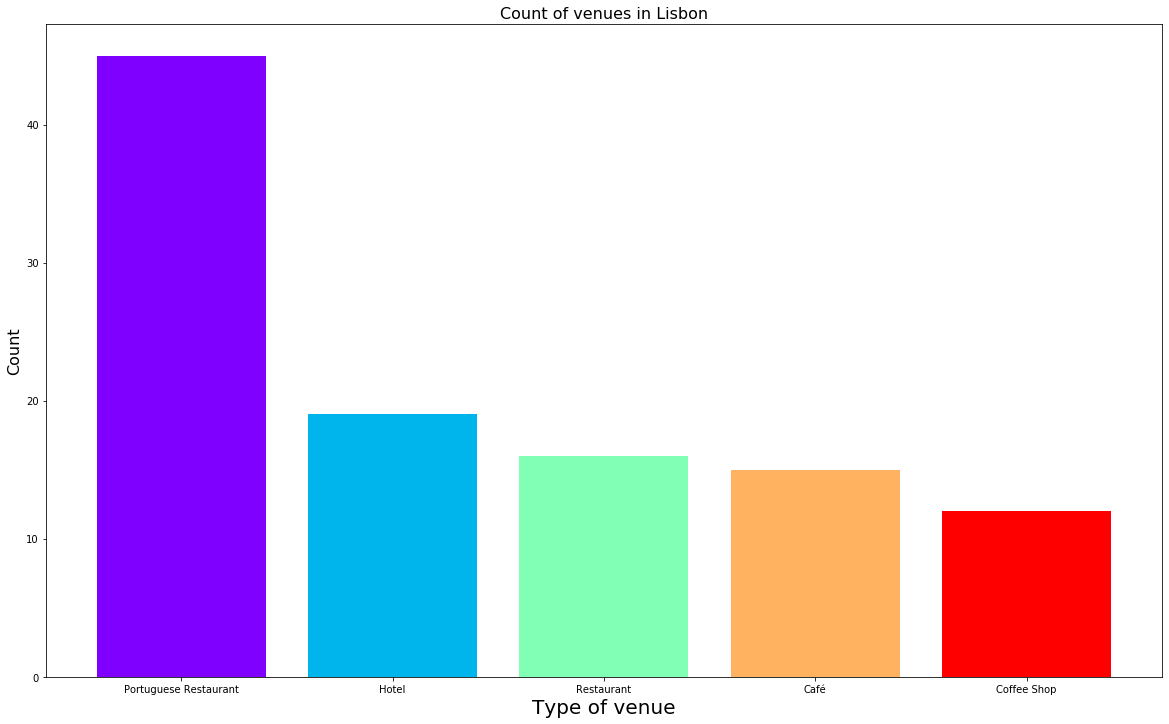

In [15]:
plt.figure(figsize = (20, 12))
plt.bar(df2.index, df2.values, color = cm.rainbow(np.linspace(0, 1, len(df2.index))))
plt.xlabel("Type of venue", fontsize = 20)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues in Lisbon", fontsize = 16)

In [23]:
def colorr(i):
    if i == 'Portuguese Restaurant':
        return('red')
    elif i == 'Restaurant':
        return('yellow')
    else:
        return('blue')

### A map of restaurants within venues

In [215]:
rest_map = folium.Map(location=[38.734825, -9.143337], zoom_start=13, tiles = 'Stamen Terrain')

for Latitude, Longitude, i in zip(nearby_venues.VenueLatitude, nearby_venues.VenueLongitude, nearby_venues.VenueCategory):
     folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=i,
        fill=True,
        color='black',
        fill_color=colorr(i),
        fill_opacity=0.6
        ).add_to(rest_map)

# display map
rest_map

### Let's create a dataframe with every hotel only

In [99]:
lisbon_hotel = nearby_venues.loc[nearby_venues['VenueCategory'] == 'Hotel']
lisbon_hotel

,Neighborhood,Venue,VenueLatitude,VenueLongitude,VenueCategory
34,Alfama,Santiago de Alfama,38.711449,-9.131231,Hotel
36,Alfama,Memmo Alfama,38.710304,-9.130199,Hotel
40,Alfama,Hotel convento do Salvador,38.712807,-9.129892,Hotel
49,Alfama,Alfama Lounge Suites,38.713654,-9.128511,Hotel
53,Alfama,Hotel Palacete Chafariz de'l Rei,38.709806,-9.129534,Hotel
68,Mouraria,Hotel Portugal,38.714400,-9.136865,Hotel
73,Mouraria,Tesouro da Baixa,38.714640,-9.137485,Hotel
77,Mouraria,Lisboa Tejo Hotel,38.713620,-9.136734,Hotel
79,Mouraria,The Beautique Hotel,38.713519,-9.137683,Hotel
95,Principe Real,Memmo Príncipe Real Hotel,38.716161,-9.146148,Hotel


In [101]:
hotel_map = folium.Map(location=[38.734825, -9.143337], zoom_start=13, tiles = 'Stamen Terrain')

for Latitude, Longitude in zip(lisbon_hotel.VenueLatitude, lisbon_hotel.VenueLongitude):
     folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=i,
        fill=True,
        color='black',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(hotel_map)

# display map
hotel_map

## 4- Looking at the places to implant the restaurant by using cluster method

In [125]:
array = ['Restaurant', 'Portuguese Restaurant', 'Café']
lisb_rest = nearby_venues.loc[nearby_venues['VenueCategory'].isin(array)]
lisb_rest

,Neighborhood,Venue,VenueLatitude,VenueLongitude,VenueCategory
7,Alcântara,1300 Taberna,38.702888,-9.178968,Restaurant
8,Alcântara,Rio Maravilha,38.701798,-9.178076,Portuguese Restaurant
15,Alcântara,Cantina LX Factory,38.703228,-9.178896,Portuguese Restaurant
16,Alcântara,chef nino,38.703059,-9.178802,Café
17,Alcântara,Village Underground,38.700861,-9.178150,Café
...,...,...,...,...,...
306,Arroios,Franguinho Real,38.730520,-9.136216,Portuguese Restaurant
308,Arroios,O Telheirinho,38.730796,-9.136367,Portuguese Restaurant
313,Arroios,Restaurante Quionga,38.732946,-9.131793,Portuguese Restaurant
316,Penha de Franca,Café Esplanada do Miradouro do Monte Agudo,38.726286,-9.131437,Café


In [185]:
kclusters = 5

lisbon_rest_cluster = lisb_rest.drop(['Venue','VenueCategory','Neighborhood'], 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lisbon_rest_cluster)

kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [186]:
lisbon_rest_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [187]:
lisbon_rest_cluster

,Cluster Labels,VenueLatitude,VenueLongitude
7,1,38.702888,-9.178968
8,1,38.701798,-9.178076
15,1,38.703228,-9.178896
16,1,38.703059,-9.178802
17,1,38.700861,-9.178150
...,...,...,...
306,0,38.730520,-9.136216
308,0,38.730796,-9.136367
313,0,38.732946,-9.131793
316,0,38.726286,-9.131437


Text(0.5, 1.0, 'Clusters of restaurants/cafés in Lisbon')

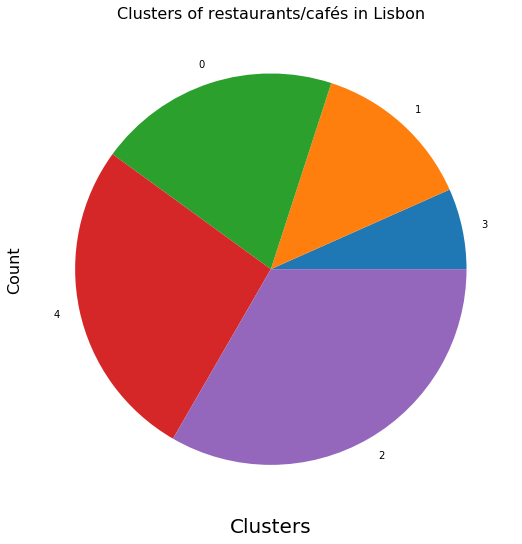

In [194]:
df3 = lisbon_rest_cluster['Cluster Labels'].value_counts().sort_values(ascending=True)
df3

plt.figure(figsize = (9, 9))
plt.pie(x = [1 , 2, 3, 4, 5], labels = df3.index)
plt.xlabel("Clusters", fontsize = 20)
plt.ylabel("Count", fontsize = 16)
plt.title("Clusters of restaurants/cafés in Lisbon", fontsize = 16)

In [207]:
Cluster_targeted = lisbon_rest_cluster.loc[lisbon_rest_cluster['Cluster Labels'] == 3]
Cluster_targeted

,Cluster Labels,VenueLatitude,VenueLongitude
142,3,38.695090,-9.212624
145,3,38.695259,-9.212497
148,3,38.695248,-9.208428
157,3,38.696385,-9.209303
158,3,38.701688,-9.208539
282,3,38.711753,-9.213203


## This is where a new business restaurant would be the least competed

In [220]:
cluster_map = folium.Map(location=[38.696385 	, -9.209303], zoom_start=14, tiles = 'OpenStreetMap')

for Latitude, Longitude in zip(Cluster_targeted.VenueLatitude, Cluster_targeted.VenueLongitude):
     folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=i,
        fill=True,
        color='black',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(cluster_map)

# display map
cluster_map